# Vertex Nomination For Two Networks

Back in [Chapter 8](#link?), you learned about the vertex nomination problem when you had one network. Now, we're going to reshape this problem a little bit.

To do this, we're going to turn to a classic example: school networks. First, you have the friends lists of 50 students from a popular social networking site. For any two individual students in the school, there is a probability of $0.7$ that they are friends on the social networking site. The realization of the network you are given will be called your social network, and looks like this:

In [44]:
from graspologic.simulations import er_np

nsoc = 50
p = 0.5
Asoc = er_np(nsoc, p)

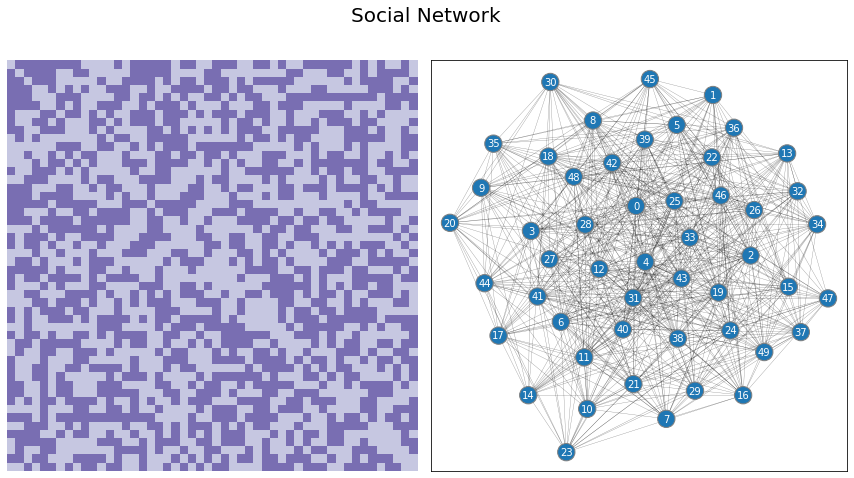

In [45]:
from graphbook_code import draw_multiplot
from matplotlib import pyplot as plt

draw_multiplot(Asoc, title="Social Network");

Separately, you also conduct a survey of the students at the school. The nodes are 40 students from the school. You poll the 40 students, and ask them who their friends are. For any given pair of students, an edge exists if either of the two students listed they were friends with the other. As it turns out, students are friends on the social networking site with people at a much higher rate than they are friends with people in real life, so $50\%$ of the edges from the social network don't exist in this survey network:

In [46]:
import numpy as np
# pick 40 students at random from the original network
# as your seeds
nsurvey = 40
# choose the nodes that we have survey data for
nodes_matched = np.sort(np.random.choice(nsoc, size=nsurvey, replace=False))
# copy over the corresponding subnetwork induced by nodes_matched
Asoc_ss = Asoc[nodes_matched,:][:,nodes_matched]

# remove 50% of the edges at random
# create a mask for upper triangle
utri_mask = np.zeros((nsurvey, nsurvey), dtype=bool)
utri_mask[np.triu_indices(nsurvey, k=1)] = True
# compute nnz edges
Asoc_ss[~utri_mask] = 0
nnz = Asoc_ss.sum()
# choose the 50% of edges to remain
nz_edges = np.nonzero(Asoc_ss)
retain_edges = np.random.choice(nz_edges[1].shape[0], size=int(np.floor(0.5*nnz)), replace=False)

Asurvey = np.zeros((nsurvey, nsurvey))
Asurvey[nz_edges[0][retain_edges], nz_edges[1][retain_edges]] = 1
# symmetrize
Asurvey = Asurvey + Asurvey.T

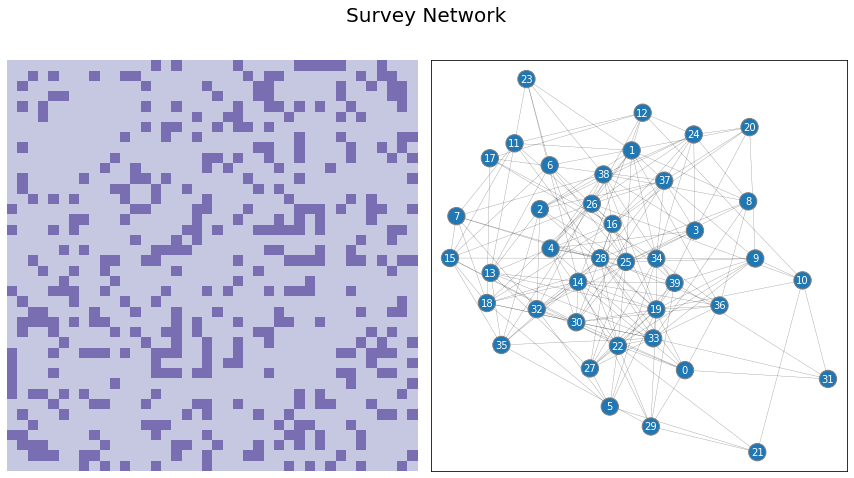

In [41]:
draw_multiplot(Asurvey, title="Survey Network");

The problem is as follows: when processing the social networking friends lists and the self-reported surveys, you numbered the students from 1 to 50 in the first network, and 1 to 40 in the second network, and then *totally* forgot the names of all but 4 of the students! Given a student for whom you have their corresponding friends list for, can you identify the corresponding node or nodes in the second network (the self-reported survey) that these results correspond to? 

In [43]:
# choose which of the 40 nodes in the second network
# will be seeds
nseeds = 5
seeds_survey = np.random.choice(nsurvey, size=nseeds, replace=False)
# and get the corresponding node number from the social network
seeds_soc = nodes_matched[seeds_survey]

To better understand this problem better, let's explore how this problem looks a lot like two problems we've seen already. 

This looks a lot like the [vertex nomination problem](#link?) because we have one node of interest, and we want to identify a set of nodes that look "similar" to this node. By "similar", we mean that we want the set of nodes that we identify to have patterns that look a lot like this node (the *nominee* nodes). This problem is different from the vertex nomination problem because the nominees are nodes from the self-reported survey network, and *not* from the social networking friends list network.

This problem looks like the [seeded graph matching problem](#link?), too, which we just learned about in the preceding section. This is because we have two networks (the social networking friends list network and the self-reported friend survey network), and we know a *node correspondance* for 5 of the nodes in the network (the 5 students we still have the names of). This problem is different from the seeded graph matching problem because don't necessarily need to match the whole network, we just want to find candidate nodes for a small subset of the network.


```{figure} ../../Images/vnsgm.png
---
scale: 80%
align: center
name: graphbook-mod
---
The graphic illustrates the two-graph vertex nomination problem. We have two sets of nodes, one for the social network (green) and one for the self-reported survey (orange). Amongst these nodes, we have a subset of nodes (squares) for which there exists a corresponding matched seed in the second network (dashed lines). For our node of interest in the social network (yellow star), we seek to identify a set of nominee nodes in the survey network (red circles)
```

## Conceptually Understanding the problem space

For this section, we're going to cheat a little bit just so that we can understand the problem a little bit better. In the real problem, 

You know that for each school, you were able to obtain 40 students from each school across both the social networking friends list and the survey. This means you have both the social networking friends list and survey results from a total of 80 students across both the social networking friends list and the survey results. If we remember way back to [Chapter 4](#link?), we introduced the concept of the "subnetwork induced by a set of nodes," which will come in handy here for illustration purposes. The subnetwork induced by a set of nodes, if you recall, consists of all of the nodes in your set (the 80 students across each of the schools) and all of the edges amongst these nodes (for any two students which are in your set of nodes, whether or not they are friends). Since we have two networks here (the social networking site friend data and the self-reported friend survey results), we have two edge sets. In this case, we will plot the 